# Data

In [1]:
from custom_dataset import *

/home/yizhou/miniconda3/envs/cliport/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of the model checkpoint at microsoft/resnet-18 were not used when initializing ResNetModel: ['classifier.1.weight', 'classifier.1.bias']
- This IS expected if you are initializing ResNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ResNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [2]:
batch_size = 12

In [3]:
train_dataset = HandleDataset4Cliport("/home/yizhou/Research/temp1/")
val_dataset = HandleDataset4Cliport("/home/yizhou/Research/temp1/", is_train = False)

100%|██████████████████████████████████████████████████████████████████████████| 174/174 [00:00<00:00, 2330.24it/s]


In [4]:
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, shuffle=True, batch_size=batch_size, collate_fn=collate_fn)


In [5]:
# batch = next(iter(train_loader))
# x, y, l = batch 

# Model

In [6]:
from custom_cliport import *

In [7]:
model = CustomCliport()
model = model.cuda()

In [8]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [9]:
from tqdm.auto import tqdm

# Train

In [10]:
total_step = 0
best_val_loss = 1e6

In [11]:
for epoch in range(20):
    train_loss_list = []
    for batch in tqdm(train_loader):
        total_step += 1

        x, y, l = batch

        batch_size = x.size(0)
        pred_y = model(x, l)
        
        # reshape
        y = y.view(batch_size, -1)
        pred_y = pred_y.view(batch_size, -1)
        
        optimizer.zero_grad()
        loss = (-y * F.log_softmax(pred_y, -1)).sum()
        loss.backward()
        optimizer.step()
        
        train_loss_list.append(loss.item())

    print(epoch, "train loss: ", np.mean(train_loss_list))
    
    model.eval()
    val_loss_list = []
    for batch in tqdm(val_loader):
        total_step += 1

        x, y, l = batch

        batch_size = x.size(0)
        pred_y = model(x, l)
        
        # reshape
        y = y.view(batch_size, -1)
        pred_y = pred_y.view(batch_size, -1)
        
        loss = (-y * F.log_softmax(pred_y, -1)).sum()
        val_loss_list.append(loss.item())
    
    val_loss = np.mean(val_loss_list)
    print(epoch, "val loss: ", val_loss)
    
    # save model
    if val_loss < best_val_loss:
        model_path = '/home/yizhou/Research/temp0/custom_cliport823.pth'
        torch.save(model.state_dict(), model_path)
        best_val_loss = val_loss 
    
    

100%|████████████████████████████████████████████████████████████████████████████| 117/117 [00:07<00:00, 15.68it/s]


0 train loss:  19356.2581630609


100%|██████████████████████████████████████████████████████████████████████████████| 37/37 [00:01<00:00, 28.08it/s]


0 val loss:  16610.593208931587


100%|████████████████████████████████████████████████████████████████████████████| 117/117 [00:05<00:00, 21.90it/s]


1 train loss:  17623.143997061965


100%|██████████████████████████████████████████████████████████████████████████████| 37/37 [00:01<00:00, 28.82it/s]


1 val loss:  15653.096983213682


100%|████████████████████████████████████████████████████████████████████████████| 117/117 [00:05<00:00, 21.32it/s]


2 train loss:  16658.5578258547


100%|██████████████████████████████████████████████████████████████████████████████| 37/37 [00:01<00:00, 27.43it/s]


2 val loss:  15000.033387880068


100%|████████████████████████████████████████████████████████████████████████████| 117/117 [00:05<00:00, 21.23it/s]


3 train loss:  15608.62610176282


100%|██████████████████████████████████████████████████████████████████████████████| 37/37 [00:01<00:00, 28.53it/s]


3 val loss:  15184.095597550675


100%|████████████████████████████████████████████████████████████████████████████| 117/117 [00:05<00:00, 21.26it/s]


4 train loss:  15099.995809962607


100%|██████████████████████████████████████████████████████████████████████████████| 37/37 [00:01<00:00, 27.77it/s]


4 val loss:  15102.30198215794


100%|████████████████████████████████████████████████████████████████████████████| 117/117 [00:05<00:00, 21.12it/s]


5 train loss:  14728.716421274039


100%|██████████████████████████████████████████████████████████████████████████████| 37/37 [00:01<00:00, 28.76it/s]


5 val loss:  16295.052404455237


100%|████████████████████████████████████████████████████████████████████████████| 117/117 [00:05<00:00, 20.82it/s]


6 train loss:  14421.218407785791


100%|██████████████████████████████████████████████████████████████████████████████| 37/37 [00:01<00:00, 27.73it/s]


6 val loss:  15195.01685230152


100%|████████████████████████████████████████████████████████████████████████████| 117/117 [00:05<00:00, 21.88it/s]


7 train loss:  14309.554762620191


100%|██████████████████████████████████████████████████████████████████████████████| 37/37 [00:01<00:00, 26.70it/s]


7 val loss:  14598.023384712838


100%|████████████████████████████████████████████████████████████████████████████| 117/117 [00:05<00:00, 22.16it/s]


8 train loss:  14217.01867988782


100%|██████████████████████████████████████████████████████████████████████████████| 37/37 [00:01<00:00, 29.38it/s]


8 val loss:  15235.089988914697


100%|████████████████████████████████████████████████████████████████████████████| 117/117 [00:05<00:00, 22.03it/s]


9 train loss:  13994.14597522703


100%|██████████████████████████████████████████████████████████████████████████████| 37/37 [00:01<00:00, 28.82it/s]


9 val loss:  14879.600242820947


100%|████████████████████████████████████████████████████████████████████████████| 117/117 [00:05<00:00, 22.43it/s]


10 train loss:  13761.780048076924


100%|██████████████████████████████████████████████████████████████████████████████| 37/37 [00:01<00:00, 25.32it/s]


10 val loss:  14971.18530933277


100%|████████████████████████████████████████████████████████████████████████████| 117/117 [00:05<00:00, 21.52it/s]


11 train loss:  13703.915155916133


100%|██████████████████████████████████████████████████████████████████████████████| 37/37 [00:01<00:00, 28.17it/s]


11 val loss:  15122.077715899493


100%|████████████████████████████████████████████████████████████████████████████| 117/117 [00:05<00:00, 20.92it/s]


12 train loss:  13695.411550146902


100%|██████████████████████████████████████████████████████████████████████████████| 37/37 [00:01<00:00, 28.66it/s]


12 val loss:  15993.125184755068


100%|████████████████████████████████████████████████████████████████████████████| 117/117 [00:05<00:00, 22.23it/s]


13 train loss:  13525.039129273504


100%|██████████████████████████████████████████████████████████████████████████████| 37/37 [00:01<00:00, 28.71it/s]


13 val loss:  16171.78295238598


100%|████████████████████████████████████████████████████████████████████████████| 117/117 [00:05<00:00, 21.81it/s]


14 train loss:  13403.293260884082


100%|██████████████████████████████████████████████████████████████████████████████| 37/37 [00:01<00:00, 26.98it/s]


14 val loss:  15524.54614917652


100%|████████████████████████████████████████████████████████████████████████████| 117/117 [00:05<00:00, 21.73it/s]


15 train loss:  13344.529651609242


100%|██████████████████████████████████████████████████████████████████████████████| 37/37 [00:01<00:00, 27.02it/s]


15 val loss:  17190.99780933277


100%|████████████████████████████████████████████████████████████████████████████| 117/117 [00:05<00:00, 20.73it/s]


16 train loss:  13188.429432926016


100%|██████████████████████████████████████████████████████████████████████████████| 37/37 [00:01<00:00, 27.18it/s]


16 val loss:  16223.314558699325


100%|████████████████████████████████████████████████████████████████████████████| 117/117 [00:05<00:00, 20.44it/s]


17 train loss:  13251.729283520299


100%|██████████████████████████████████████████████████████████████████████████████| 37/37 [00:01<00:00, 26.17it/s]


17 val loss:  17055.56001900338


100%|████████████████████████████████████████████████████████████████████████████| 117/117 [00:05<00:00, 20.15it/s]


18 train loss:  13240.845832498664


100%|██████████████████████████████████████████████████████████████████████████████| 37/37 [00:01<00:00, 26.59it/s]


18 val loss:  15593.562315244932


100%|████████████████████████████████████████████████████████████████████████████| 117/117 [00:05<00:00, 20.89it/s]


19 train loss:  15109.280870225695


100%|██████████████████████████████████████████████████████████████████████████████| 37/37 [00:01<00:00, 27.33it/s]

19 val loss:  19719.550121410473


# Test

In [24]:
# model_path = '/home/yizhou/Research/temp0/custom_cliport823.pth'
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [43]:
batch = next(iter(val_loader))

TypeError: 'tuple' object is not an iterator

In [26]:
x, y, l = batch

In [27]:
x.shape, y.shape, l.shape

(torch.Size([12, 512, 7, 7]),
 torch.Size([12, 256, 256]),
 torch.Size([12, 512]))

In [28]:
pred_y = model(x, l)

In [29]:
import matplotlib.pyplot as plt

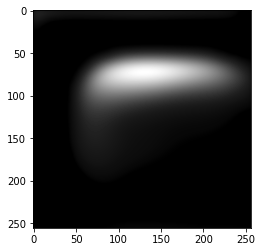

In [32]:
plt.imshow(np.array(pred_y[3].cpu().data) * 255, cmap = "gray")

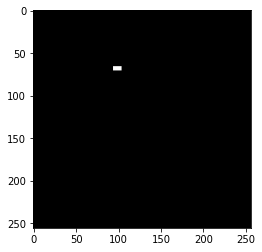

In [41]:
plt.imshow(np.array(y[11].cpu().data) * 255, cmap = "gray")

In [20]:
torch.argmax(y[3].cpu().data).item() // 256, torch.argmax(y[3].cpu().data).item() % 256

(64, 112)

In [33]:
torch.argmax(pred_y[3].cpu().data).item() // 256, torch.argmax(pred_y[3].cpu().data).item() % 256

(73, 130)

In [42]:
pred_max_index = torch.argmax(pred_y[11].cpu().data).item() 

h, w =  pred_max_index// 256, pred_max_index % 256
print(h,w)

# get direction
top_bound = max(h - 5, 0)
bottom_bound = min(h + 5, 255)

left_bound = max(w - 5, 0)
right_bound = min(w + 5, 255)

# mean over vertical direction
v_mean = torch.mean(pred_y[0][top_bound:bottom_bound, w]).item()
h_mean = torch.mean(pred_y[0][left_bound:right_bound, h]).item()

handle_dir = "horizontal" if v_mean > h_mean else "vertical" # if vertical direction more concentrate, then direciton is horizontal

print(handle_dir)

75 97
horizontal
